<center><img alt="" src="images/Cover.jpg"/></center> 

## <center><font color="blue">Decision Tree, Random Forest, and Naive Bayes Classifier</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2019</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id" target="_blank"><span style="color: #0009ff;">https://tau-data.id</span></a></h2>

# Notes and Disclaimer

* This notebook is part of the free (open knowledge) eLearning course at: https://tau-data.id/courses/
* Some images are taken from several resources, we respect those images ownerships and put a reference/citation from where it is originated. Nevertheless, sometimes we are having trouble to find the origin of the image(s). If you are the owner of the image and would like the image taken-out (or want the citation to be revised) from this open knowledge course resources please contact us here with the details: https://tau-data.id/contact/  
* Unless stated otherwise, in general tau-data permit its resources to be copied and-or modified for non-commercial purposes. With condition proper acknowledgement/citation is given.

In [2]:
# Loading Modules
import warnings; warnings.simplefilter('ignore')
!pip install graphviz
!pip install dtreeviz
import graphviz, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import model_selection, tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from dtreeviz.trees import *
from IPython.core.display import display, HTML

sns.set(style="ticks", color_codes=True)

## Outline:

* Review Kuliah Sebelumnya
* Some quick (Python) codes for the previous lectures 
* Decision Tree, 
* Random Forest, 
* Naive Bayes Classifier

## Review:
<img alt="" src="images/KDD.jpg" style="width: 650px; height: 376px;" />

## Association Rule: Rule, Support, Confidence, Lift by Example
<img alt="" src="images/Rule_Lift_Support_Confidence.png" style="width: 300px ; height: 181px" />
<img alt="" src="images/Rule_Lift_Support_Confidence_example.png" style="width: 300px; height: 222px;" />
* http://www.saedsayad.com/association_rules.htm

## k-Nearest Neighbour
<img alt="" src="images/6_kNN.JPG" style="height:300px; width:711px" />

## Logistic Regression
<img alt="" src="images/reg_to_log.png" style="width: 650px; height: 328px;" />

### Cross Validation and Metrics
<img alt="" src="images/confusion_matrix.png" style="width: 600px ; height: 210px" />

# Some quick (Python) codes for the previous lectures

## Kembali ke Teori dulu sebelum melanjutkan aplikasinya

# Decision Tree
<img alt="" src="images/6_DT.png" style="height:336px; width:904px" />


<img alt="" src="images/6_DT_meme.png" style="height:342px; width:460px" />

# Interactive Explanation of a Decision Tree

* http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
* http://www.r2d3.us/visual-intro-to-machine-learning-part-2/

# More resources:

* http://www.saedsayad.com/decision_tree.htm
* 

<h3>Asumsi (induktif bias) dari&nbsp; Decision tree</h3>
<img alt="" src="images/6_asumsi_DT.JPG" style="height:300px; width:300px" />

## Lebih Tepatnya
<p><img alt="" src="images/Dec_Tree_Asumsi_Depth.png" style="width: 650px; height: 122px;" /></p>


## Teori Decision Tree : Information theory
<img alt="" src="images/dec_Tree_Theory.png" style="width: 600px; height: 337px;" />

<p><img alt="" src="images/Entropy.png" style="width: 650px; height: 290px;" /></p>


<p><img alt="" src="images/Information_Gain.png" style="width: 650px; height: 199px;" /></p>


<p><img alt="" src="images/Contoh_Entropy.png" style="width: 469px; height: 339px;" /></p>


<p><img alt="" src="images/Contoh_Gain.png" style="width: 650px; height: 456px;" /></p>
* Contoh Lain: http://www.saedsayad.com/decision_tree.htm

## Alternative to Information Gain : Gini Index (CART)
https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1

## Belum (tidak) Dibahas
* Impurity Functions
* Prunning
* Numeric variables
* Optimizations

<p><u><strong>When to use:</strong></u></p>

<ul>
	<li>Target : Binomial/nominal.</li>
	<li>Predictors (input): binomial, nominal, and-or interval (ratio).</li>
</ul>

<p><u><strong>Advantage:</strong></u></p>

<ul>
	<li>Fast and embarrassingly parallel.</li>
	<li>Tanpa iterasi, cocok untuk&nbsp;Big Data technology (e.g. Hadoop)[map-reduce friendly]</li>
	<li>Interpretability</li>
	<li>Robust terhadap outliers &amp; missing values</li>
</ul>

<p><u><strong>Disadvantage:</strong></u></p>

<ul>
	<li>Non probabilistic (ad hoc heuristic) +/-</li>
	<li>Target dengan banyak kelas</li>
	<li>Sensitive (instability)</li>
</ul>


In [4]:
# Load DataFile CSV
try:
    df = pd.read_csv('data/iris.csv') # run locally
except:
    !wget https://raw.githubusercontent.com/taufikedys/tau-data/master/data/iris.csv # "Google Colab"
    df = pd.read_csv('iris.csv') 
df.head()

,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


In [34]:
df.describe(include='all')

,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [35]:
df['SPECIES'] = df['SPECIES'].astype('category')
print(df.groupby('SPECIES').size())
df.describe(include='all') # try without the parameter

SPECIES
1    50
2    50
3    50
dtype: int64


,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
count,150.0,150.000000,150.000000,150.000000,150.000000
unique,3.0,NaN,NaN,NaN,NaN
top,3.0,NaN,NaN,NaN,NaN
freq,50.0,NaN,NaN,NaN,NaN
mean,NaN,5.843333,3.057333,3.758000,1.199333
std,NaN,0.828066,0.435866,1.765298,0.762238
min,NaN,4.300000,2.000000,1.000000,0.100000
25%,NaN,5.100000,2.800000,1.600000,0.300000
50%,NaN,5.800000,3.000000,4.350000,1.300000
75%,NaN,6.400000,3.300000,5.100000,1.800000


In [36]:
# Separate Data
X = df[['SEPALLEN','SEPALWID','PETALLEN','PETALWID']]
Y = df['SPECIES']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(105, 4) 45


In [37]:
# Build the model and Evaluate
dt_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=seed) # Default Gini
dt = dt_model.fit(X_train, Y_train)
dt_prediction = dt.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, dt_prediction))
print(confusion_matrix(Y_test, dt_prediction))
print(classification_report(Y_test, dt_prediction))

Akurasi =  0.9777777777777777
[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.93      1.00      0.97        14
           3       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



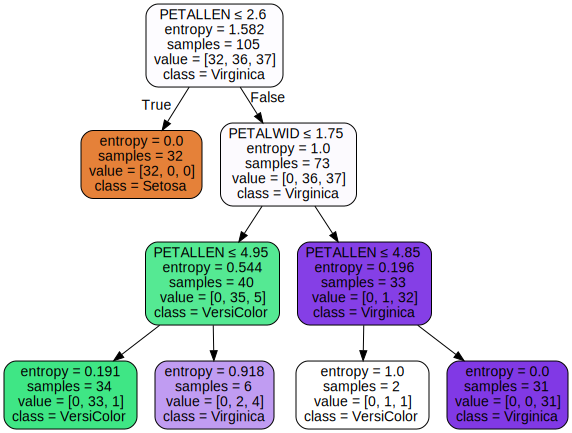

In [38]:
# May not work in Google Colab, use Anaconda
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
var_names = ['SEPALLEN','SEPALWID', 'PETALLEN','PETALWID']
categories = ['Setosa', 'VersiColor', 'Virginica']
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names = var_names,  
                         class_names=categories,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
# Interpretation is much easier from the graph
# Installing GraphViz : https://stackoverflow.com/questions/49471867/installing-graphviz-for-use-with-python-3-on-windows-10

In [39]:
# Varible importance
dt.feature_importances_

array([0.        , 0.        , 0.70559151, 0.29440849])

In [1]:
# Alternatively

viz = dtreeviz(decisionTree,
              X_train,
              Y_train,
              target_name='SPECIES',
              feature_names=var,
              class_names=['Setosa', 'VersiColor', 'Virginica']
              )  
display(HTML(viz.svg()))
viz.view()

NameError: name 'dtreeviz' is not defined

<img alt="" src="images/5_RandomForest.png" style="width: 592px; height: 444px;" />

In [42]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_prediction = rf.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, rf_prediction))
print(confusion_matrix(Y_test, rf_prediction))
print(classification_report(Y_test, rf_prediction))
# Ensemble less effective on strong classifiers

Akurasi =  0.9777777777777777
[[18  0  0]
 [ 0 14  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.93      1.00      0.97        14
           3       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



Feature ranking:
1. feature 2 (0.491956)
2. feature 3 (0.279822)
3. feature 0 (0.192330)
4. feature 1 (0.035891)


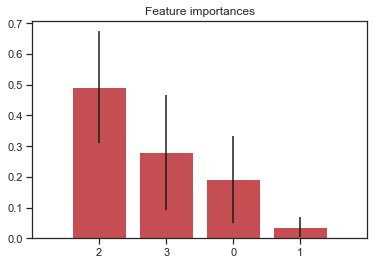

In [43]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Naive Bayes Classifier

<img alt="" src="images/naive_bayes.png" style="width: 400px ; height: 220px" />

<ul>
	<li>P(x) konstan, sehingga bisa diabaikan.</li>
	<li>Asumsi terkuatnya adalah independensi antar variabel prediktor (sehingga dikatakan &quot;Naive&quot;)</li>
	<li>Klasifikasi dilakukan dengan menghitung probabilitas untuk setiap kategori ketika diberikan data x = (x1,x2,...,xm)</li>
	<li>Untuk data yang besar bisa menggunakan out-of-core approach (partial fit):<br />
	http://scikit-learn.org/stable/modules/scaling_strategies.html#scaling-strategies</li>
	<li>Variasi NBC adalah bagaimana P(c|x) dihitung, misal dengan distribusi Gaussian (Normal) - sering disebut sebagai Gaussian Naive Bayes (GNB):</li>
</ul>
<img alt="" src="images/Gaussian.png" style="width: 303px ; height: 50px" />


<p><em><strong>Pros:</strong></em></p>

<ul>
	<li>Cepat dan mudah di implementasikan</li>
	<li>Cocok untuk permasalahan multiclass</li>
	<li>Jika asumsi terpenuhi (independent) biasanya performanya cukup baik dan membutuhkan data (training) yang lebih sedikit.</li>
	<li>Biasanya baik digunakan untuk prediktor kategorik, untuk numerik NBC mengasumsikan distribusi normal (terkadang tidak terpenuhi)&nbsp;</li>
</ul>

<p><em><strong>Cons:</strong></em></p>

<ul>
	<li>Jika di test data memuat kategori yang tidak ada di training data ( ==&gt; probabilitas = 0). Sering disebut sebagai masalah&nbsp; &ldquo;Zero Frequency&rdquo;.&nbsp;</li>
	<li>Asumsi yang sangat kuat (independen antar prediktor).</li>
</ul>


In [44]:
# Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(X_train, Y_train)
nbc_prediction = nbc.predict(X_test)

print('Akurasi = ', accuracy_score(Y_test, nbc_prediction))
print(confusion_matrix(Y_test, nbc_prediction))
print(classification_report(Y_test, nbc_prediction))
# Hati-hati Sparse ==> Dense bisa memenuhi memory untuk data relatif cukup besar
# Akurasi cukup baik

Akurasi =  1.0
[[18  0  0]
 [ 0 14  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Evaluation Metrics II

<h2>Metrics in Python</h2>

<p><img alt="" src="images/6_Evaluasi_ML.JPG" style="height:400px; width:515px" /></p>
http://scikit-learn.org/stable/modules/model_evaluation.html

# Cross Validation

In [45]:
# Cross validation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score
import time

gnb = GaussianNB()
mulai = time.time()
scores_svm = cross_val_score(gnb, X, Y, cv=10,scoring='accuracy') # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy Naive Bayes Classifier: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

Accuracy Naive Bayes Classifier: 0.95 (+/- 0.09), Waktu = 0.040 detik


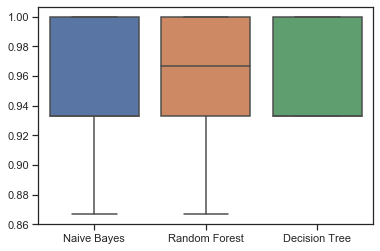

In [46]:
# Model Comparisons using Cross Validation
Models = [('Naive Bayes',gnb), ('Random Forest',rf), ('Decision Tree',dt_model)]
Scores = {}
for model_name, model in Models:
    Scores[model_name] = cross_val_score(model, X, Y, cv=10,scoring='accuracy')

dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)

<h1>End of Module</h1>
<hr />